In [103]:
import pandas as pd

# Load the dataset (adjust path if needed)
df = pd.read_csv("german_credit_data.csv")  # Replace with your actual path

# Display the first 5 rows
print(" First 5 rows:")
print(df.head())

# Display the shape of the dataset
print("\n Dataset shape:")
print(df.shape)

# Show all column names
print("\n Column names:")
print(df.columns.tolist())

# Display basic info about the dataset
print("\n Data types and non-null counts:")
print(df.info())

# Display number of missing values per column
print("\n Missing values per column:")
print(df.isnull().sum())


 First 5 rows:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

 Dataset shape:
(1000, 10)

 Column names:
['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']

 Data types and non-null counts:
<class 'pandas.core.fram

In [105]:
import pandas as pd

# Load the extracted CSV file
df = pd.read_csv("german_credit_data.csv")

# Show the first 5 rows
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [107]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [109]:
df = pd.get_dummies(df, drop_first=True)


In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])


In [113]:
import pandas as pd

# Load the extracted CSV file
df = pd.read_csv("archive (3)/german_credit_data.csv")

# Show the first 5 rows
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [115]:
df = df.drop(columns=['Unnamed: 0'])  


In [117]:
df['Saving accounts'] = df['Saving accounts'].fillna('No Info')
df['Checking account'] = df['Checking account'].fillna('No Info')


In [119]:
print(df.columns)


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [121]:
df['Saving accounts'].isnull().sum()


0

In [123]:
ordinal_saving = {'No Info': 0, 'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4}
ordinal_checking = {'No Info': 0, 'little': 1, 'moderate': 2, 'rich': 3}

df['Saving accounts'] = df['Saving accounts'].map(ordinal_saving)
df['Checking account'] = df['Checking account'].map(ordinal_checking)

# One-hot encode the rest
df = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], drop_first=True)


In [125]:
print(df['Saving accounts'].unique())
print(df['Checking account'].unique())

print(df.columns)

df.head()



[0 1 3 4 2]
[1 2 0 3]
Index(['Age', 'Job', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration', 'Sex_male', 'Housing_own', 'Housing_rent', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0,1,1169,6,True,True,False,False,False,False,False,True,False,False
1,22,2,1,2,5951,48,False,True,False,False,False,False,False,True,False,False
2,49,1,1,0,2096,12,True,True,False,False,False,True,False,False,False,False
3,45,2,1,1,7882,42,True,False,False,False,False,False,True,False,False,False
4,53,2,1,1,4870,24,True,False,False,True,False,False,False,False,False,False


In [129]:
df[['Age', 'Credit amount', 'Duration']].describe()


,Age,Credit amount,Duration
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.329071e-17,6.661338e-17,1.136868e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.455261e+00,-1.070865e+00,-1.402415e+00
25%,-7.516417e-01,-6.754833e-01,-7.386675e-01
50%,-2.239269e-01,-3.373443e-01,-2.408572e-01
75%,5.676451e-01,2.484620e-01,2.569531e-01
max,3.470076e+00,5.370789e+00,4.239436e+00


In [79]:
# # Map 'bad' to 0 and 'good' to 1
# df['credit_risk'] = df['credit_risk'].map({'bad': 0, 'good': 1})


In [131]:


# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Display the correlation matrix
print(correlation_matrix)


                                  Age       Job  Saving accounts  \
Age                          1.000000  0.015673        -0.017997   
Job                          0.015673  1.000000        -0.040803   
Saving accounts             -0.017997 -0.040803         1.000000   
Checking account            -0.049058 -0.054255        -0.005614   
Credit amount                0.032716  0.285385        -0.107538   
Duration                    -0.036136  0.210910        -0.064526   
Sex_male                     0.161694  0.070298        -0.029310   
Housing_own                  0.006553 -0.059393         0.014937   
Housing_rent                -0.212620 -0.039195         0.024267   
Purpose_car                  0.099919  0.036762        -0.019768   
Purpose_domestic appliances -0.012562 -0.025979        -0.002661   
Purpose_education            0.060390 -0.021672        -0.040447   
Purpose_furniture/equipment -0.127657  0.013422         0.028516   
Purpose_radio/TV            -0.046401 -0.027683 

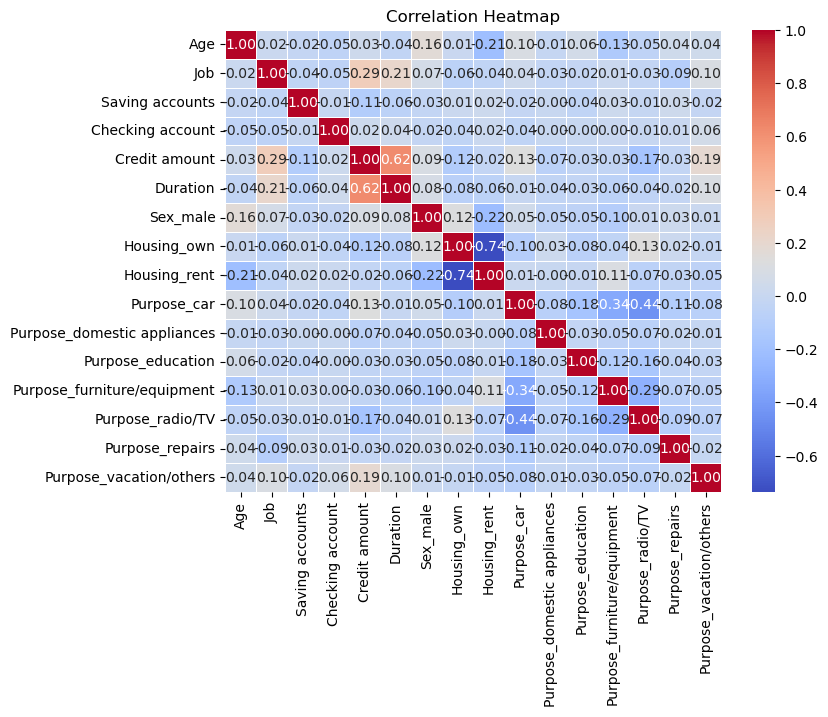

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


In [101]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
corr_matrix = df.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop them
df_reduced = df.drop(columns=to_drop)

print("Dropped features:", to_drop)
print("Remaining features shape:", df_reduced.shape)


Dropped features: []
Remaining features shape: (1000, 17)


In [135]:
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,2,0,1,-0.745131,-1.236478,True,True,False,False,False,False,False,True,False,False
1,-1.191404,2,1,2,0.949817,2.248194,False,True,False,False,False,False,False,True,False,False
2,1.183312,1,1,0,-0.416562,-0.738668,True,True,False,False,False,True,False,False,False,False
3,0.831502,2,1,1,1.634247,1.750384,True,False,False,False,False,False,True,False,False,False
4,1.535122,2,1,1,0.566664,0.256953,True,False,False,True,False,False,False,False,False,False


In [138]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_


In [152]:
 df['credit_risk'] = df.apply(lambda row: 'good' if row['Credit amount'] > 5000 and row['Duration'] > 20 else 'bad', axis=1)


In [164]:
# Calculate the 75th percentile for Credit amount and Duration
credit_amount_75 = df['Credit amount'].quantile(0.75)
duration_75 = df['Duration'].quantile(0.75)

# Apply new logic to classify 'good' and 'bad'
df['credit_risk'] = df.apply(
    lambda row: 'good' if row['Credit amount'] > credit_amount_75 and row['Duration'] > duration_75 else 'bad',
    axis=1
)

# Check the distribution of 'credit_risk'
print(df['credit_risk'].value_counts())


credit_risk
bad     847
good    153
Name: count, dtype: int64


In [168]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
from collections import Counter
print(Counter(y_resampled))


Counter({0: 847, 1: 847})


In [172]:
# Encode categorical columns (if necessary)
df_encoded = pd.get_dummies(df, columns=['Sex_male', 'Housing_own', 'Housing_rent', 
                                          'Purpose_car', 'Purpose_domestic appliances', 
                                          'Purpose_education', 'Purpose_furniture/equipment',
                                          'Purpose_radio/TV', 'Purpose_repairs', 
                                          'Purpose_vacation/others'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['credit_risk'])
y = df_encoded['credit_risk'].map({'good': 1, 'bad': 0})  # Convert target to numeric (1 for good, 0 for bad)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

# Check performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9533333333333334
Confusion Matrix:
[[256   3]
 [ 11  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       259
           1       0.91      0.73      0.81        41

    accuracy                           0.95       300
   macro avg       0.93      0.86      0.89       300
weighted avg       0.95      0.95      0.95       300



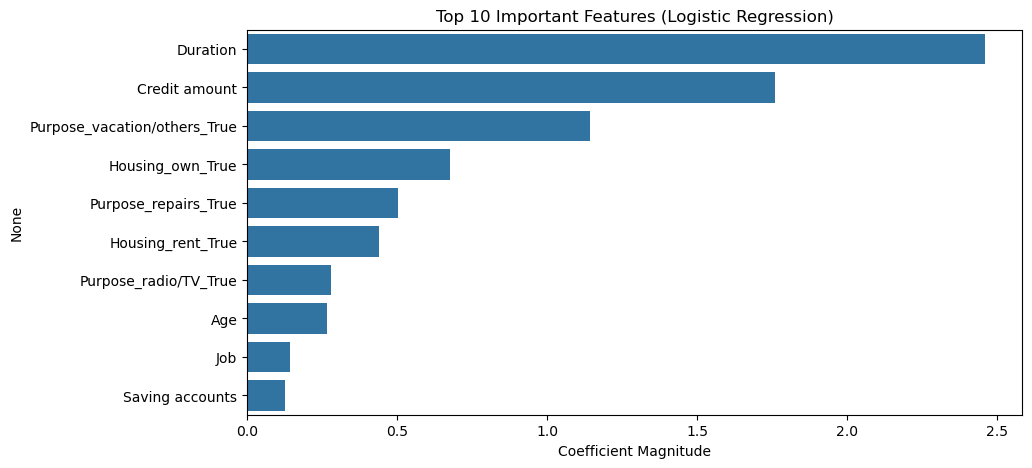

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = pd.Series(model.coef_[0], index=X.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Important Features (Logistic Regression)')
plt.xlabel('Coefficient Magnitude')
plt.show()


In [176]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f"Average F1 Score: {scores.mean():.2f}")


Average F1 Score: 0.82


In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')


Random Forest Accuracy: 1.0
Confusion Matrix:
[[259   0]
 [  0  41]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00        41

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



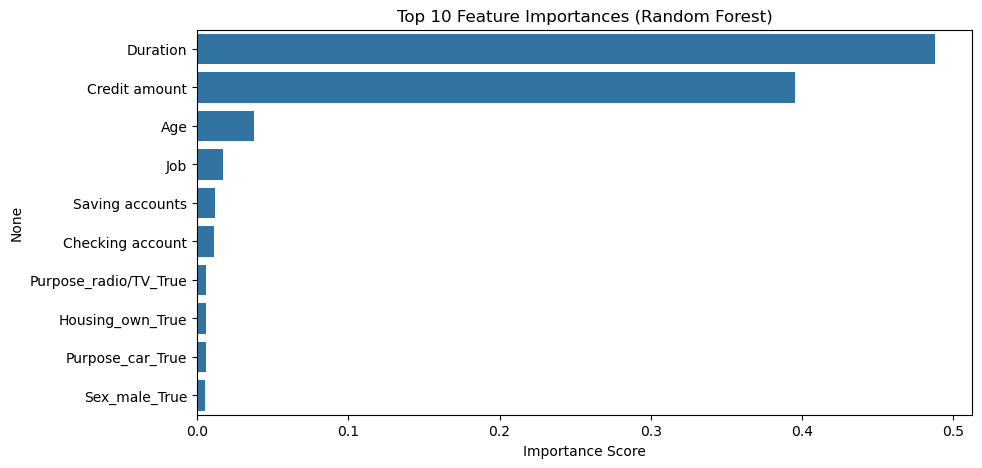

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()


In [184]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9633333333333334
[[258   1]
 [ 10  31]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       259
           1       0.97      0.76      0.85        41

    accuracy                           0.96       300
   macro avg       0.97      0.88      0.91       300
weighted avg       0.96      0.96      0.96       300



In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.97
[[258   1]
 [  8  33]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       259
           1       0.97      0.80      0.88        41

    accuracy                           0.97       300
   macro avg       0.97      0.90      0.93       300
weighted avg       0.97      0.97      0.97       300



In [188]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 1.0
[[259   0]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00        41

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

